In [1]:
'''
Project #4
Math 266 Linear Algebra
Nicholas Kong
Summer 2020
'''

#import libraries
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt 
from sympy import Matrix
import os
plt.ion()


The size of the ratings_matrix is (1682, 943)


The First Five Movies In The Dictionary.

0.  Toy Story (1995)
1.  GoldenEye (1995)
2.  Four Rooms (1995)
3.  Get Shorty (1995)
4.  Copycat (1995)
press a key to continuef


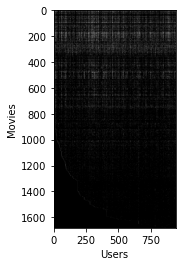

press return to continuef


'f'

In [2]:

ratings_matrix = np.load("ratings_matrix.npy")
os.system('clear')

# confirm the shape of the matrix is (1682,943)

print(f'\nThe size of the ratings_matrix is {ratings_matrix.shape}\n')  

# ratings_matrix is a 1682x943 matrix, containing ratings(1-5) of 1682 movies by
# 943 users.  A 0 rating indicates that the user did not rate that movie.
# the (i,j) entry in the matrix is the rating user j gave for movie i.

# load the python dictionary that we will use to map movie id's to movie titles
# note: to determine the title of a movie given its id# we type in dictionary[id#]
# where id# the the movie id number.
# For example: dictionary[0] will return "Toy Story (1995)" as Toy Story has id# = 0

dictionary = np.load("dictionary.npy").item()

# let us display the first 5 entries in the dictionary

print('\nThe first five movies in the dictionary.\n'.title())

for k in range(5):
    print(f'{k}.  {dictionary[k]}')

# Your output should appear as below. Notice again the movie Toy Story has movie id 0. 
# So the first row in the ratings_matrix corresponds to the movie Toy Story.

# 0.  Toy Story (1995)
# 1.  GoldenEye (1995)
# 2.  Four Rooms (1995)
# 3.  Get Shorty (1995)
# 4.  Copycat (1995)

input('press a key to continue')

# Let us visualize the ratings_matrix

plt.close()
plt.imshow(ratings_matrix,cmap='gray')
plt.xlabel('Users')
plt.ylabel('Movies')
plt.show()

input('press return to continue')


In [3]:
# To find the average rating for the movie Toy Story we need to ignore the entries
# in the row with zero values as these are not ratings.

# first find column indices with non zero entries on row 0
indices = ratings_matrix[0,:]>0

average = ratings_matrix[0,indices].mean()
print(f'\n\nThe average rating for Toy Story is {average.round(2)}')

# We can find the total points for a movie by just summing the row for that movie
# Let us find the total score for Toy Story

total_score = ratings_matrix[0,:].sum()
print(f'\nThe total score for Toy Story is {total_score}')

# Your turn -- Find the five top movies in terms of total scores -- 
# print out the five move titles
# once you have a list of the id's for the top five movies use a for loop
# like above to print out the titles.

print('\n\nThe five movies with largest totals scores:\n'.title())

scores = []
index_list = []
for j in range(0,1682):
    index_list.append(j)

for i in range(0, ratings_matrix.shape[0]):
    idx = ratings_matrix[i,:]>0
    ttl_score = ratings_matrix[i, idx].sum()
    scores.append(ttl_score)

    
score_arr = np.asarray(scores).reshape(1682,1)
index_arr = np.asarray(index_list).reshape(1682,1)

matrix = np.hstack((score_arr, index_arr))

sorted_list = np.asarray(sorted(matrix, key=lambda row:row[0]))

top_5 = sorted_list[-6:-1]
top5idx = top_5[:,1]

result = [dictionary[i] for i in top5idx]

for i in range(len(result)):
    print(result[i])



The average rating for Toy Story is 3.88

The total score for Toy Story is 1753


The Five Movies With Largest Totals Scores:

Godfather, The (1972)
Raiders of the Lost Ark (1981)
Contact (1997)
Return of the Jedi (1983)
Fargo (1996)


In [4]:
# In this part of the exercise we will implement a simple movie recommender system using
# cosine similarity.

# If two vectors are normalized (norm=1) then the cosine similarity between the two vectors
# is computed by simply computing the dot product of the vectors.  This dot product returns
# a scalar that will give us a measure of how similar the two vectors are. We thus can determine
# how similar two movies are by forming the dot product of the normed feature vectors for each 
# movie. The feature vectors are the rows of the ratings_matrix.


# Let us compare the movies Toy_Story and Full_Metal_Jacket.  These movies should not be similar.

# first normalize the vector for each movie.  Note Full Metal Jacke has movie id #187
toy_story_norm = ratings_matrix[0,:]/norm(ratings_matrix[0,:])
Full_Metal_Jacket_norm = ratings_matrix[187,:]/norm(ratings_matrix[187,:])

# now compute the similarity between the two movies and display the result.
similarity_1 = np.dot(toy_story_norm,Full_Metal_Jacket_norm)

print(f'The similarity measure between Toy Story and Full Metal Jacket is {similarity_1}')

#  Now we compare the movies Star Wars #49  and Return of the Jedi #180.  These movies should be similar.

Star_Wars_norm = ratings_matrix[49,:]/norm(ratings_matrix[49,:])
Return_of_the_Jedi_norm = ratings_matrix[180,:]/norm(ratings_matrix[180,:])

# now compute the similarity between the two movies and display the result.
similarity_2 = np.dot(Star_Wars_norm,Return_of_the_Jedi_norm)

print(f'\nThe similarity measure between Star Wars and Return of the Jedi is {similarity_2}')
print('\n\n')
input('press return to continue\n\n\n')


The similarity measure between Toy Story and Full Metal Jacket is 0.4173157994938935

The similarity measure between Star Wars and Return of the Jedi is 0.8844757466059624



press return to continue





''

In [5]:
# The results show that this cosine similarity stuff works. Cool!
# Now your turn

# Write a python function called top_five that will take as an input the id# 
# for a movie a user likes and return a list of the 5 movies we recommend to the user.
# These will be the five movies most "similar" to the input.

# For example when the function is executed with with Titanic #312 as input the output
# generated is below. Of course the first movie in the list should be the movie itself.

# Titanic (1997)
# Good Will Hunting (1997)
# Contact (1997)
# Apt Pupil (1998)
# Tomorrow Never Dies (1997)

# below is the function you are to complete.  Some hints will be given during lecture.

def top_5(m,i):

 # This program will determine the 5 rows in matrix m
 # that are most similar to the target row i.
 #
 # Cosine similartiy is used in determining similarity

 # first normalize all the rows of matrix m. You will need to determine the norm of each row
 # that can be done by using np.linalg.norm on the matrix and say work on rows.
    m = m/np.linalg.norm(m, axis = 0)

 # Second compute the list similarites between the target row and all the rows of the matrix.
   
    
    similarities = np.dot(m, ratings_matrix[i,:]/norm(ratings_matrix[i,:]))
        
 # Third use np.argsort to find the index values that will sort this list. This will return the arguments
 # sorted from smallest similarity to largest.  We want the opposite so reverse your list and extract the 
 # first five values using 
 # l[::-1][:5]  This assumes you have the index values stored in list l

 # uncomment and complete teh code below:
    l = np.argsort(similarities)
    l = l[::-1][:5]

 # Finally use a for loop to print out the 5 movie titles.
    for i in range(0,5):
        print(dictionary[l[i]])
 # end of function

In [6]:
# uncomment the lines below to test it
print('The top five recommendations for Toy Story are:\n'.title())
top_5(ratings_matrix,0)

# Test top_five with the input movie "Room with a View" #212

# uncomment the line below to test it
print('\n\nThe top five recommendations for Room with a View are:\n'.title())
top_5(ratings_matrix,212)


The Top Five Recommendations For Toy Story Are:

Toy Story (1995)
Star Wars (1977)
Return of the Jedi (1983)
Fargo (1996)
Independence Day (ID4) (1996)


The Top Five Recommendations For Room With A View Are:

Room with a View, A (1986)
Fargo (1996)
Star Wars (1977)
Raiders of the Lost Ark (1981)
Pulp Fiction (1994)


In [13]:
# ========== Part 4: Dimensionality reduction using SVD  ============

# This part is completely optional and not for the faint of heart.

# Use the procedure outlined in chapter 7 in the text to reduce the data matrix
# from size 1682x943  to size 1682x100.
# We  thus are reducing the dimension of our feature vectors from 1682 to 100.

# After reducing your matrix redo the last two exercises above and compare your 
# results.  They should be the same!

#Finding the rank of the ratings_matrix
# rank = np.linalg.matrix_rank(ratings_matrix)
# U, sig, VT = np.linalg.svd(ratings_matrix,full_matrices=0)
# sig = np.diag(sig)

# #U is the user to concept matrix
# #V is the movie to concept matrix
# concept = np.dot(M[0,:], VT)

#in sigma, set the smallest 100 values to 0. Since sigma is in decreasing order,
#we need to take out the last few rows and set it to 0

M = ratings_matrix
#Computing PCA
Mavg = np.mean(M, axis = 1).reshape(M.shape[0], 1)

#Mean centered data
B = M - Mavg
U, sig, VT= np.linalg.svd(B, full_matrices = 0)
sig = np.diag(sig)
C = np.cov(B, ddof = 1)
val, vec = np.linalg.eig(C)

principal_components = U @ sig

result = []

for j in range(B.shape[0]):
    for h in range(100):
        x = VT[h,:] @ B[j,:].T
        result.append(x)

In [18]:
print(len(result))
result_arr =np.array(result).reshape(1682,100)
print(result_arr.shape)

168200
(1682, 100)


In [19]:
print('\n\nThe top five recommendations for Room with a View are:\n'.title())
top_5(result_arr,212)




The Top Five Recommendations For Room With A View Are:



ValueError: shapes (1682,100) and (943,) not aligned: 100 (dim 1) != 943 (dim 0)